In [1]:
import arviz as az
from ipywidgets import interact
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import preliz as pz

In [2]:
az.style.use('arviz-doc')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "False",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/Logo_UNSAM.png" width="300">
<br>
<br>
<h1 align="center">Inferencia Bayesiana</h1>



<br>
<br>
<br>
<br>
<br>

## Objetivos


* Repasar el teorema de Bayes
* Repasar conceptos centrales en estadística Bayesiana
* Discutir el rol e interpretación de las probabilidades en estadística Bayesiana
* Comprender las diferencias entre distribuciones a priori, a priori predictiva, a posteriori y a posteriori predictiva 

## Modelado Bayesiano

<br>

* La estadística es una forma de modelado 

* Los modelos estadísticos generan datos

* Un modelo Bayesiano tiene dos requisitos:
    1. Las cantidades desconocidas (parámetros) son modeladas usando **distribuciones de probabilidad**
    2. Las cantidades conocidas (datos) son combinadas con la **distribución a priori de parámetros** usando el **Teorema de Bayes**

## Teorema de Bayes
<br>

$$\underbrace{p(\theta \mid Y)}_{a \ posteriori} = \frac{\overbrace{p(Y \mid \theta)}^{\text{likelihood}}\; \overbrace{p(\theta)}^{a \ priori}}{\underbrace{\color{red}{p(Y)}}_{\text{likelihood marginal}}}$$


* $\theta$ representa los parámetros en nuestros modelos (lo que queremos averiguar o aprender)
* $Y$ representa los datos
* El objeto central de la estadística Bayesiana es la distribución _a posteriori_.

* $\color{red}{p(Y) = \int_{\Theta} p(Y \mid \theta)p(\theta) d(\theta)}$ Generalmente no tiene solución analítica o es muy costosa --> métodos numéricos al rescate!

<center><img src="img/modelado_probabilista.png" width=650 /></center>

## Estadística Bayesiana

<br>

* Las distribuciones de probabiliad _distribuyen_ probabilidades (credibilidades) entre un cierto conjunto de eventos


* La estadística Bayesiana es la re-distribución de probabilidades (credibilidades)

<br>
<center><img src="img/con.gif" width=500 /></center>

## Estadística Bayesiana en 3 pasos (flujo Bayesiano simplificado)

<br>
 

1. **Crear un modelo probabilista**. Especificar un modelo de probabilidad que incluya algún tipo de conocimiento previo sobre los parámetros del modelo


2. **Condicionar el modelo a los datos observados**. Usando el teorema de Bayes la distribución a priori es actualizada de acuerdo a los datos observados,  obteniendose la distribución _a posteriori_.


3. <font color = "gray"> **Evaluar el ajuste del modelo a los datos y la sensibilidad de las conclusiones a cambios en los supuestos del modelo**. </font>

## Estadística de monedas mágicas

<br>

* Queremos modelar el resultado de arrojar una moneda al aire.
    * Resultado de una prueba de diagnóstico médico (positivo o negativo).
    * Compra de un producto en una tienda en línea (realizada o no realizada).
    * Tasa de conversión de clientes que recibieron un vourcher

* Nuestro parámetro, $\theta$, puede tomar valores en el intervalo [0, 1]
    * $\theta = 1 \implies$ siempre cara
    * $\theta = 0 \implies$ siempre ceca

* De acuerdo al teorema de Bayes es necesario definir un *likelihood* y un *prior*:


$$p(\theta \mid Y) \propto \underbrace{p(Y \mid \theta)}_{\text{?}} \; \underbrace{p(\theta)}_{?}$$

## El modelo beta-binomial (Representación matemática)

<br>
<br>

$$
p(\theta \mid Y) \propto \overbrace{\operatorname{Bin}(n=1, p=\theta)}^{p(Y \mid \theta)}\;
\overbrace{\operatorname{Beta}(\alpha, \beta)}^{p(\theta)}
$$

## El modelo beta-binomial (Representación visual)

<center>
<img src="img/modelo_1_moneda.png" width=500>


In [5]:
pz.Beta(2, 2).plot_interactive(xy_lim=(None, None, 0, 7))

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

In [6]:
pz.Bernoulli(0.5).plot_interactive(xy_lim=(-0.1, 1.1, 0, 1))

interactive(children=(FloatSlider(value=0.5, description='p (0, 1)', max=1.0, min=2.220446049250313e-16, step=…

### La distribución *a posteriori*

* Para algunos modelos es posible obtener la distribución a posteriori de forma analítica

* Defininición: Una distribución a priori es conjugada con el likelihood, si la distribución a posteriori es de la misma familia que la distribución a priori

* La distribución Beta es prior conjugado de la Binomial
<br>

$$
p(\theta \mid \mathbf{Y}) = \operatorname{Beta}(\alpha=\alpha_{prior} + y , \quad \beta= \beta_{prior} + N - y)
$$


### Obteniendo el _a posteriori_

$$
p(\theta \mid y) \propto \underbrace{{\color{gray}{\frac{N!}{y!(N-y)!}}} \theta^y (1 - \theta)^{N−y}}_{\text{likelihood}} \underbrace{{\color{gray}{\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}}}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}}_{\text{prior}}
$$

<br>

$$
p(\theta \mid y) \propto \theta^{\alpha-1+y}(1-\theta)^{\beta-1+N−y}
$$

<br>

$$
p(\theta \mid y) = \frac{\Gamma(\alpha + y +\beta + N -y)}{\Gamma(\alpha + y)\Gamma(\beta + N - y)}\, \theta^{\alpha-1+y}(1-\theta)^{\beta-1+n-y}
$$


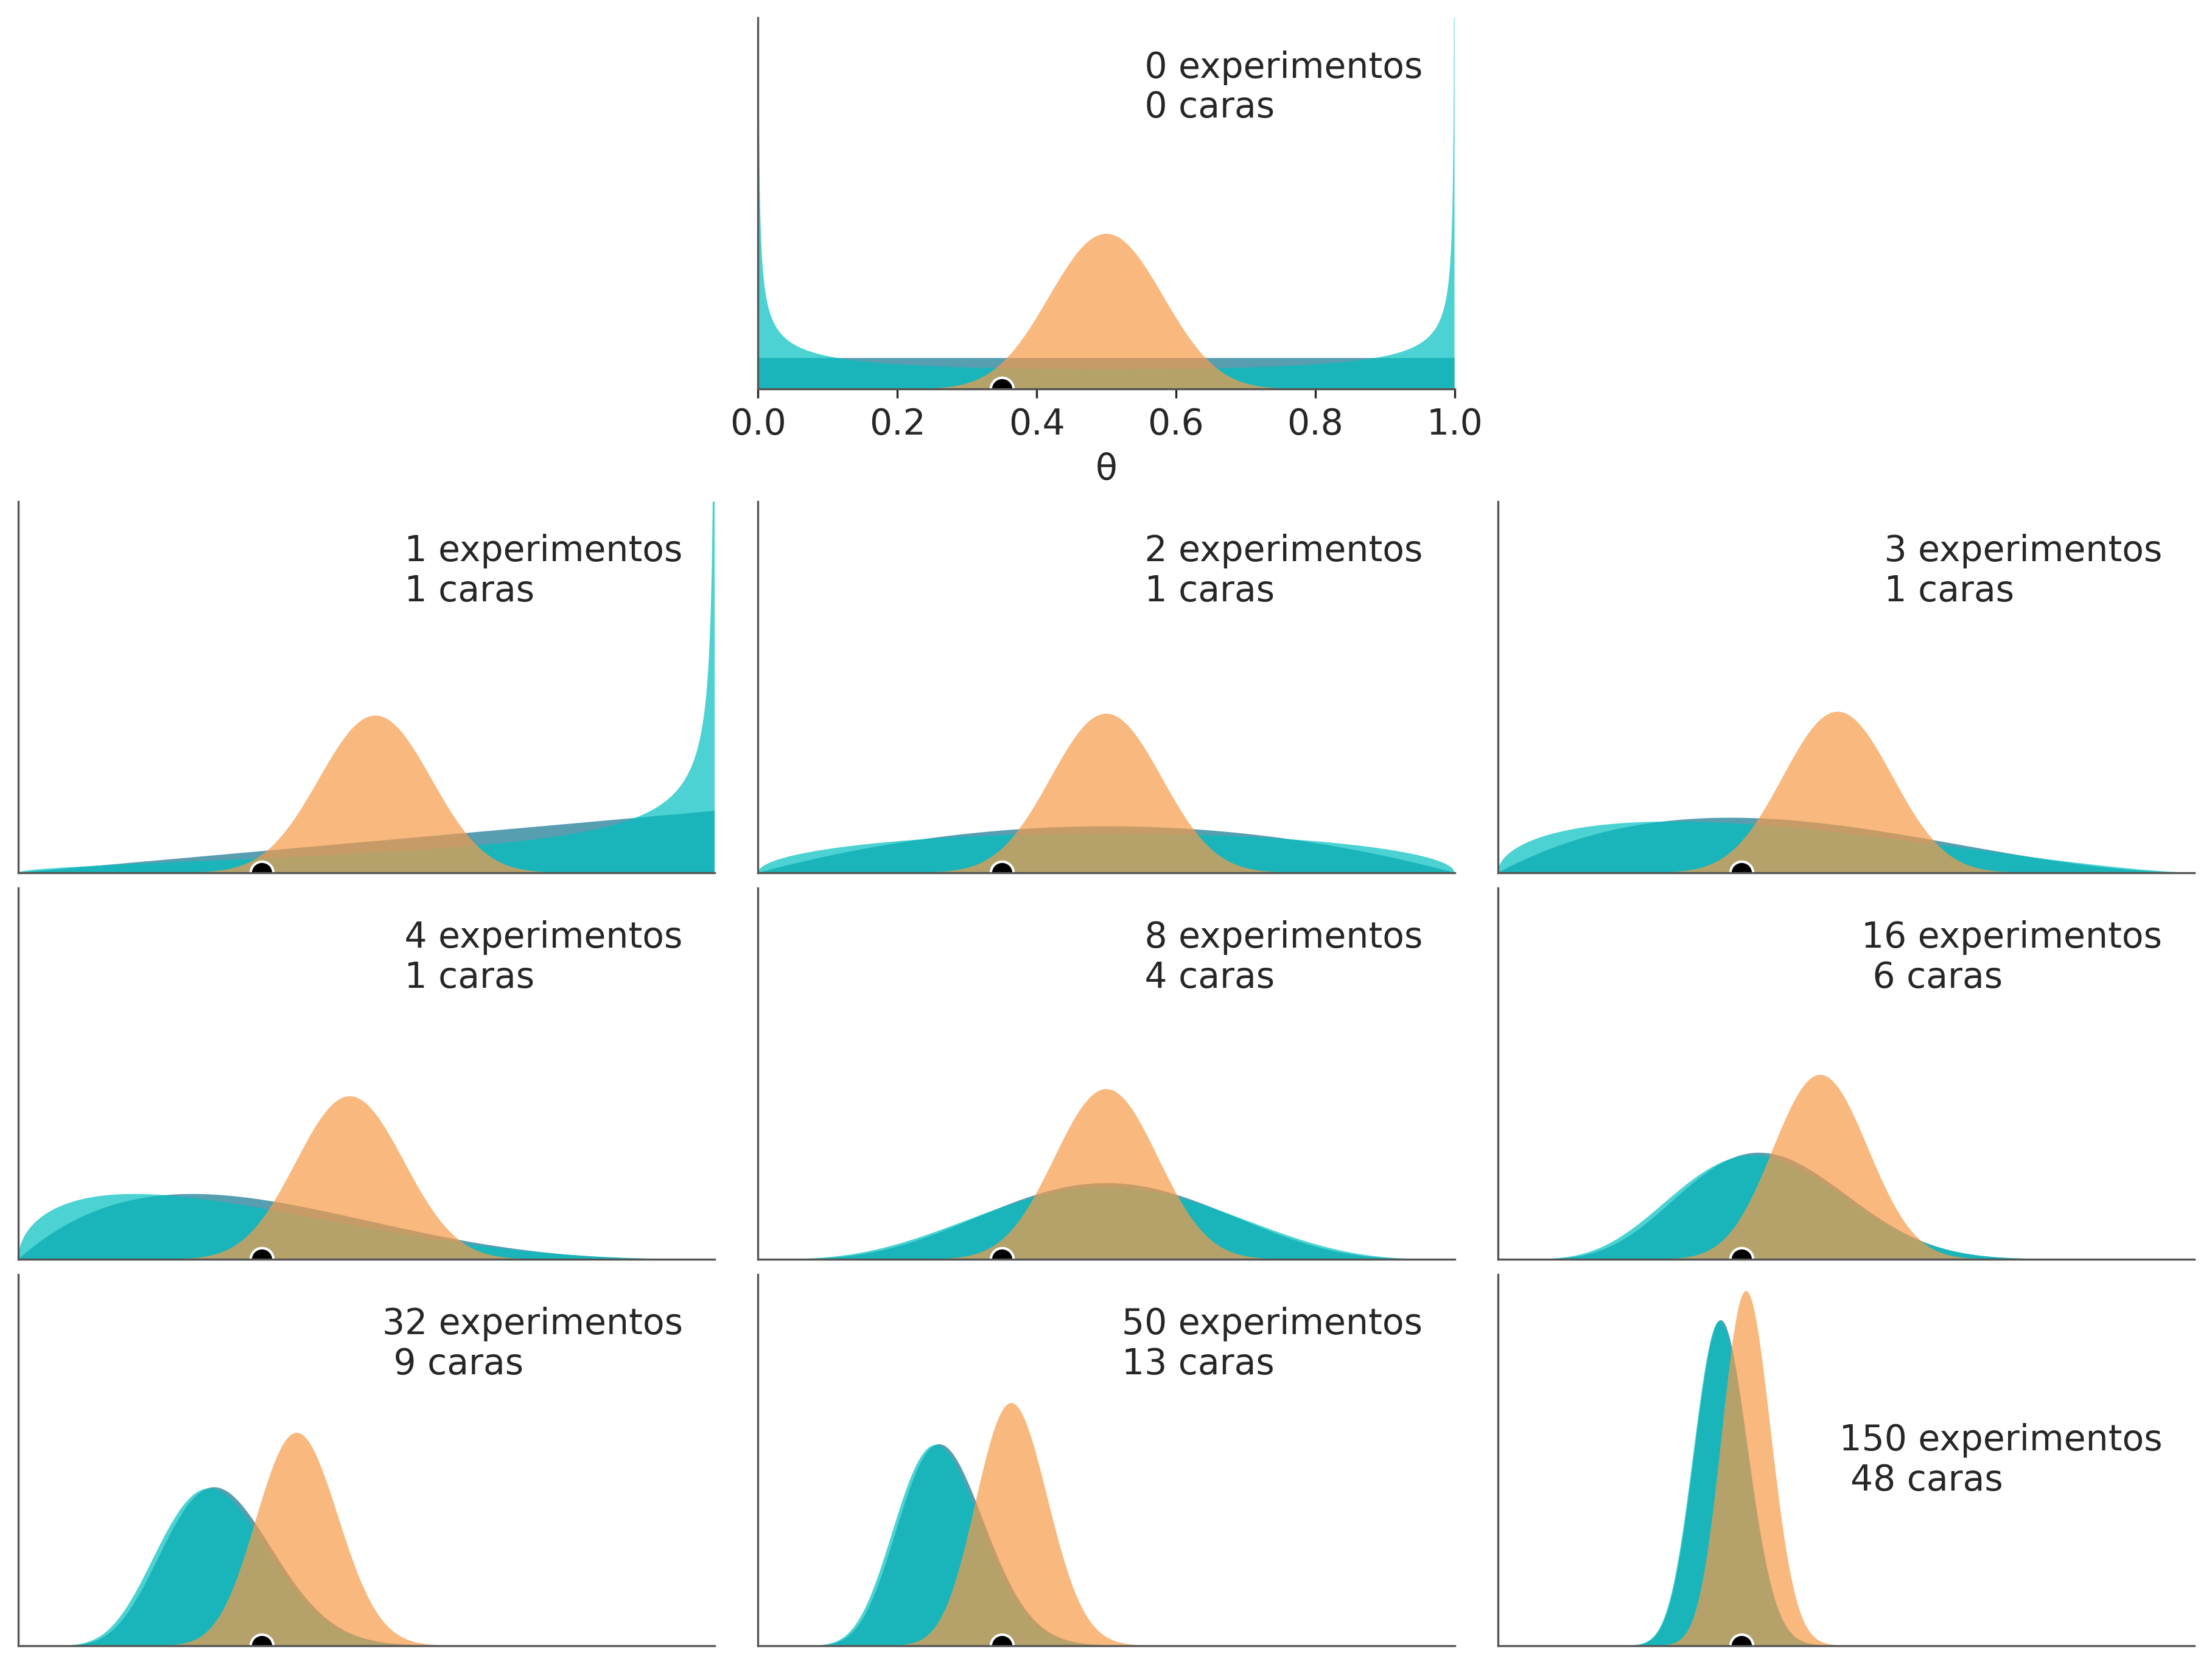

In [7]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = pz.Beta
eps = np.finfo(float).eps
x = np.linspace(eps, 1-eps, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
        plt.fill_between(x, 0, posterior, alpha=0.7)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} experimentos\n{y:4d} caras', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

## Resumen I

<br>

* La solución de un modelo Bayesiano es siempre una distribución
* La distribución _a posteriori_ representa los valores plausibles de los parámetros
* El valor más probable viene dado por la moda de la distribución (el _pico_ de la distribución)
* La dispersión o ancho de las curvas es una medida de la incertidumbre sobre los valores


## Resumen II 

<br>

* El resultado de un modelo Bayesiano usando un _a priori_ plano o no-informativo (el azul en el ejemplo anterior) en general coinciden con los resultados de análisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$).
* Dada una cantidad infinita de datos el _a priori_ es irrelevante
* Los priors son útiles para incorporar información de dominio
* A veces basta con incorporar información vaga, "tal parámetro es positivo"
* Los priors son útiles para regularizar (evitar valores extremos o fisicamente poco-plausibles)

## No solo de posteriors vive el hombre

<br>

* La distribución a priori es central en estadística Bayesiana, pero no es la única
  
* Existen otras dos distribuciones que son muy relevantes
    * Distribución predictiva _a priori_
    * Distribución predictiva _a posteriori_

<br>

## Distribución predictiva a priori

**Conceptualmente**: es la distribución de datos predicha por el modelo antes de haber visto los datos


**Matemáticamente**

$$
p(y^\ast) =  \int p(y \mid \theta) p(\theta) d\theta
$$


**Computacionalmente** (correr el modelo hacia adelante)

1. Elegir a partir de la distribución _a priori_ un valor de $\theta$
2. Introduzca ese valor la distribución usada como likelihood
3. Repita 1 y 2 tantas veces como sea necesario.

<center><img src="img/modelo_1_moneda.png" width=500></center>

## Distribución predictiva a posteriori

**Conceptualmente**: es la distribución de datos predicha ($\tilde{y}$) de acuerdo a la distribución *a posteriori* (y los ya datos observados)


**Matemáticamente**

$$p(\tilde{y} \,|\, y) = \int p(\tilde{y} \,|\, \theta) \, p(\theta \,|\, y) \, d\theta$$


**Computacionalmente** (correr el modelo hacia adelante)

1. Elegir a partir de la distribución _a posteriori_ un valor de $\theta$
2. Introduzca ese valor la distribución usada como likelihood
3. Repita 1 y 2 tantas veces como sea necesario.

<center><img src="img/modelo_1_moneda.png" width=500></center>

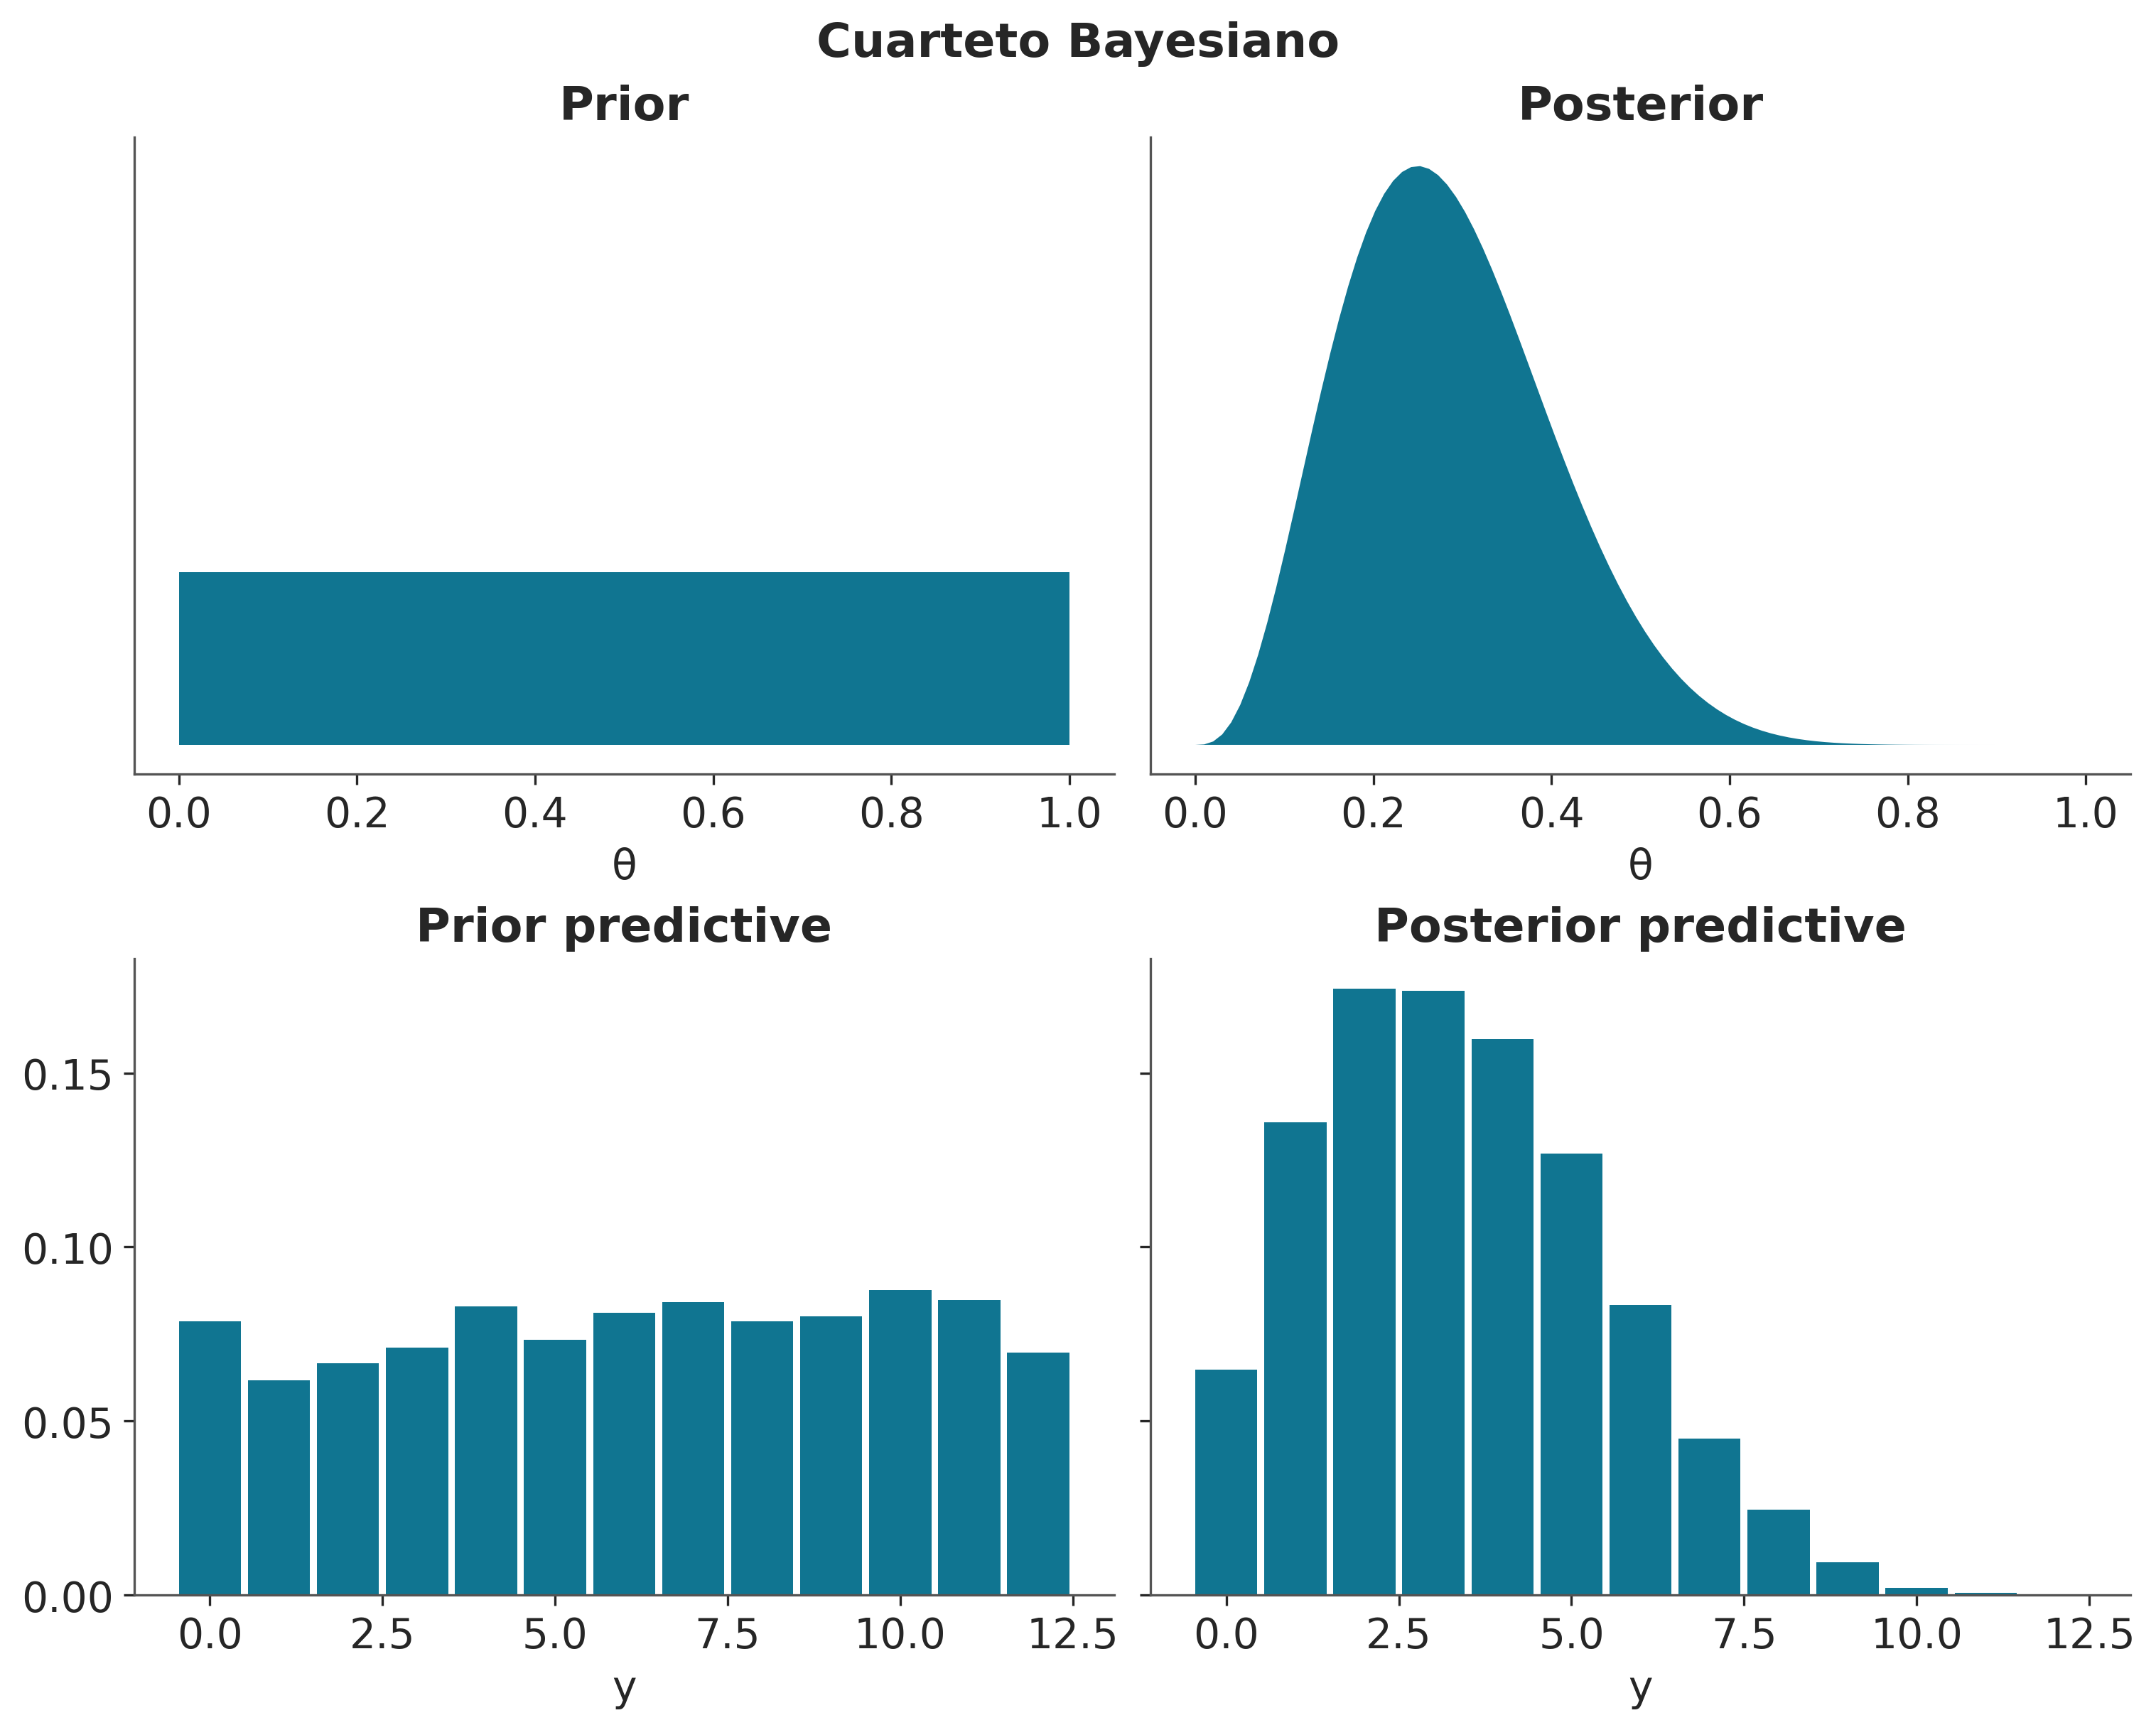

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex="row", sharey="row")
axes = np.ravel(axes)
dist = pz.Beta
a_prior = 1
b_prior = 1
N = 12
y = 3
x = np.linspace(eps, 1-eps, 100)


prior = dist(a_prior, b_prior).pdf(x)
axes[0].fill_between(x, 0, prior)
axes[0].set_title("Prior")
axes[0].set_xlabel("θ")
axes[0].set_yticks([])


posterior = dist(a_prior + y, b_prior + N - y).pdf(x)
axes[1].fill_between(x, 0, posterior)
axes[1].set_title("Posterior")
axes[1].set_xlabel("θ")


prior = dist(a_prior, b_prior).rvs(500)
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in prior])
axes[2].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[2].set_title("Prior predictive")
axes[2].set_xlabel("y")

posterior = dist(a_prior + y, b_prior + N - y).rvs(500)
prior_predictive = np.hstack([pz.Binomial(n=N, p=p).rvs(N) for p in posterior])
axes[3].hist(prior_predictive, bins=range(0, N+2), rwidth=0.9, align="left", density=True)
axes[3].set_title("Posterior predictive")
axes[3].set_xlabel("y")

fig.suptitle("Cuarteto Bayesiano", fontweight="bold", fontsize=16);

## El Zen de Bayes (recapitulando)

* Los modelos producen datos
* Los modelos tienen parámetros desconocidos
* A los valores desconocidos les asociamos distribuciones de probabilidad _a priori_
* Idealmente un _a priori_ refleja el grado de desconocimiento de los parámetros
* El teorema de Bayes nos permite combinar datos con distribuciones _a priori_
* La distribución _a posteriori_ es la distribución conjunta de los parámetros, luego de haber observado datos
* En general esperamos que la distribución _a posteriori_ tenga menos incerteza que la distribución *a priori*
* La distribución predictiva _a priori_ es la distribución que el modelo espera ver, antes de haber visto los datos
* La distribución predictiva _a posteriori_ es la distribución que el modelo espera ver, luego de haber visto los datos

## En la distribución a posteriori confiamos

* La distribución a posteriori es la consecuencia lógica de combinar los datos con el modelo
* Esa distribución contiene toda la información de un problema, y por lo tanto todas las respuestas a nuestro problema

<br>

* OK, antes de fundar la iglesia Bayesianista, hay que recordar que lo antedicho es válido solo en sentido matemático.
* En el mundo real donde no existen ni las probabilidad, ni los círculos, ni las vacas esféricas. Las cosas son algo más complejas.
* Rara vez un modelo es correcto, rara vez los datos están "limpios", rara vez las aproximaciones son exactas, rara vez no omitimos variables, etc.

## Hay vida despues (y antes) de la inferencia Bayesiana

* Calcular distribuciones a posteriori es solo una parte del análisis
* En la práctica la resolución de un problema estadístico es un proceso iterativo con varios pasos
* A ese proceso (o instancias particulares) se lo suele llamar Flujo de trabajo Bayesiano ([Bayesian Workflow](https://arxiv.org/abs/2011.01808))

## Flujo Bayesiano simplificado II
<center>
<img src="img/bayesian_workflow.png" width=500>